<a href="https://colab.research.google.com/github/leolatini/diplodatos/blob/master/Copia_de_MentoriaTP01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn 
import statistics as stats

In [0]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

In [0]:
seaborn.__version__

'0.9.0'

In [0]:
seaborn.set_context(context='talk', font_scale=1.2)

In [0]:

#dataset = pandas.read_csv(    '/home/leo/Proyectos/Diplomatura/Mentoria/Dataset/arxiv_dataset.csv',sep=';',dtype={'Id': object})
import pandas as pd
url='https://www.dropbox.com/s/q8am1p40irfrq9c/arxiv_dataset.csv?dl=1'
dataset=pd.read_csv(url,sep=';',dtype={'Id': object},parse_dates=['Created'])

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229448 entries, 0 to 229447
Data columns (total 17 columns):
Id                   229448 non-null object
Title                229448 non-null object
Abstract             229448 non-null object
Fields               229448 non-null object
Categories           229448 non-null object
Authors              229448 non-null object
Doi                  86785 non-null object
Journal              54609 non-null object
Created              229448 non-null datetime64[ns]
Year                 229448 non-null int64
Month                229448 non-null int64
Day                  229448 non-null int64
Abstract_Length      229448 non-null int64
Title_Length         229448 non-null int64
Number_Authors       229448 non-null int64
Number_Fields        229448 non-null int64
Number_Categories    229448 non-null int64
dtypes: datetime64[ns](1), int64(8), object(8)
memory usage: 29.8+ MB


In [0]:
# Calcular media mediana y moda 
dataset['Created'] = dataset['Created'].astype("datetime64")
dataset['Created'].describe()

count                  229448
unique                    727
top       2017-03-15 00:00:00
freq                      539
first     2017-01-01 00:00:00
last      2018-12-28 00:00:00
Name: Created, dtype: object

La funcion o metodo describe() nos muestra basicamente el intervalo temporal en que fueron subidos los papers que componen  todo el set de datos 

In [0]:
dataset['Month'].describe()

In [0]:
dataset.groupby(by=['Year','Month','Day']).describe()

In [0]:
dataset.groupby(by=['Year','Month']).describe()

In [0]:
#dataset['Created'] = dataset['Created'].astype("datetime64")
#dataset['Year'] = dataset['Created'].dt.year
#dataset['Month'] = dataset['Created'].dt.month
#dataset.groupby(by=['Month', 'Year']).count().plot(kind="bar")

In [0]:
dataset['Created'].value_counts()

In [0]:
dataset.groupby(['Created']).min()

In [0]:
dataset.groupby(['Created']).describe()

Abstract_Length                                                  \
                     count         mean         std    min     25%     50%   
Created                                                                      
2017-01-01           119.0   836.142857  424.883758  116.0  502.00   773.0   
2017-01-02           247.0   974.663968  453.036661   40.0  606.50   966.0   
2017-01-03           292.0   968.750000  456.732887  141.0  619.75   925.0   
2017-01-04           282.0   982.783688  459.951730   62.0  649.50   928.5   
2017-01-05           310.0  1004.341935  436.919526   87.0  683.50   976.0   
2017-01-06           241.0  1040.294606  436.683505  149.0  702.00  1010.0   
2017-01-07           128.0   958.101562  414.517894  187.0  659.25   901.5   
2017-01-08           152.0   880.671053  423.423227   73.0  574.50   863.5   
2017-01-09           341.0   955.137830  421.684788   99.0  632.00   939.0   
2017-01-10           385.0  1006.197403  425.575704  209.0  678.00   956.0   
2017-01-11           355.0   956.884507  423.255737   85.0  628.50   932.0   
2017-01-12           296.0   989.726351  425.495886  117.0  666.75   959.5   
2017-01-13           291.0  1006.639175  421.944355   87.0  706.00  1008.0   
2017-01-14           110.0   935.672727  385.324648  200.0  655.00   890.0   
2017-01-15           180.0   885.938889  380.919722   95.0  597.75   872.5   
2017-01-16           340.0   948.158824  444.582537   82.0  609.50   906.0   
2017-01-17           385.0   990.955844  435.575237  198.0  645.00   970.0   
2017-01-18           333.0   990.153153  415.404793   57.0  699.00   954.0   
2017-01-19           365.0   982.358904  395.926560   55.0  718.00   932.0   
2017-01-20           285.0   959.112281  433.933192  160.0  637.00   910.0   
2017-01-21           136.0   952.220588  405.971769  198.0  579.75   947.5   
2017-01-22           157.0   902.732484  405.852733   63.0  642.00   860.0   
2017-01-23           421.0   928.344418  413.631153  129.0  611.00   897.0   
2017-01-24           378.0   984.436508  433.963954  166.0  637.00   967.0   
2017-01-25           401.0   934.077307  413.738567  111.0  620.00   917.0   
2017-01-26           344.0   971.476744  411.540418   36.0  680.00   918.0   
2017-01-27           296.0   911.297297  426.683163  119.0  593.50   898.0   
2017-01-28           104.0   983.625000  385.486584  211.0  702.75   958.5   
2017-01-29           133.0   890.150376  385.412048   89.0  631.00   861.0   
2017-01-30           391.0   959.391304  421.279647  104.0  647.00   971.0   
...                    ...          ...         ...    ...     ...     ...   
2018-11-29           449.0   982.763920  429.062238  111.0  680.00   991.0   
2018-11-30           391.0   993.641944  405.426454   86.0  694.50   986.0   
2018-12-01           148.0   954.891892  394.230312   85.0  680.25   922.0   
2018-12-02           198.0  1011.949495  407.918497   84.0  752.50   997.0   
2018-12-03           451.0   993.594235  420.495974   68.0  677.00   990.0   
2018-12-04           400.0   962.617500  399.018289  102.0  675.00   930.5   
2018-12-05           383.0   961.300261  428.167869   73.0  642.00   935.0   
2018-12-06           390.0   995.694872  419.654806   78.0  670.25   988.5   
2018-12-07           294.0   971.428571  406.822835   79.0  677.25   944.0   
2018-12-08           133.0   900.240602  421.439078  138.0  599.00   843.0   
2018-12-09           150.0   977.273333  423.592670  103.0  657.25  1013.5   
2018-12-10           383.0   936.788512  402.131265  141.0  647.00   878.0   
2018-12-11           394.0   926.875635  409.823790  122.0  614.00   883.0   
2018-12-12           333.0   978.561562  407.796414   91.0  700.00   941.0   
2018-12-13           354.0   980.615819  406.915078  100.0  686.50   956.0   
2018-12-14           309.0   960.744337  418.525794  140.0  634.00   938.0   
2018-12-15           127.0   988.874016  414.293796  199.0  682.00   956.0   
2018-12-16           180.0   970.

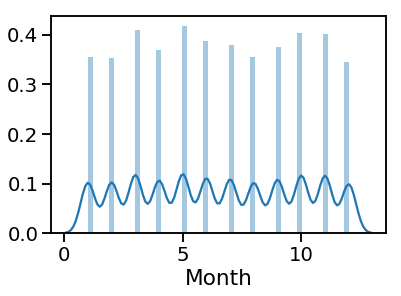

In [0]:
seaborn.distplot(dataset.Month.dropna(axis=0, how='all'))

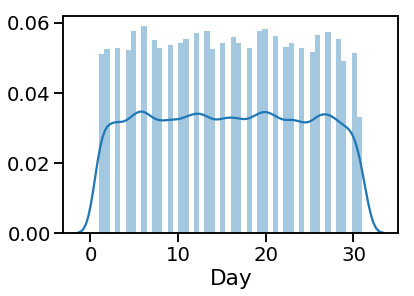

In [0]:
seaborn.distplot(dataset.Day.dropna(axis=0, how='all'))

En lineas generales se aprecia una distribucion practicamente uniforme a lo largo de los meses para los 2 años incluidos en el dataset. 
Las cantidades de papers que se crean mensualmente rondan entre un minimo de 17358 y un maximo de 21038.
Analizando a nivel de dias, vemos que la creacion de papers desde los dias 1 al 30 se asemeja a una distribucion uniforme, rondando entre los 6751 y los 8119. Y en los dias 31 disminuye a valores de 4578, lo cuales sonbastante mas bajos que los observados en los restantes dias.


In [0]:
#PUNTO 2
# calculo de la media de Title_length
print(stats.mean(dataset['Title_Length']))

75.13744290645376


In [0]:
#calculo de la mediana de Title_length
print(stats.median(dataset['Title_Length'])) 

72.0


In [0]:
#calculo de la moda de Title_length
print(stats.mode(dataset['Title_Length'])) 

71


Moda, mediana y media no coinciden en la variable Longitud del titulo, con lo cual para esta variable hay asimetría positiva.

In [0]:
#calculo de la desviación estandar de Title_length
print(stats.pstdev(dataset['Title_Length']))

27.596189325445376


In [0]:
#mismos calculos pero de otra forma mas sencilla, utilizando .describe()
dataset['Title_Length'].describe()

count    229448.000000
mean         75.137443
std          27.596249
min           3.000000
25%          55.000000
50%          72.000000
75%          92.000000
max         280.000000
Name: Title_Length, dtype: float64

In [0]:
# calculo de la media de Number_Authors
print(stats.mean(dataset['Number_Authors']))

4.87321310275095


In [0]:
#calculo de la mediana de Number_Authors
print(stats.median(dataset['Number_Authors'])) 

3.0


In [0]:
#calculo de la moda de Number_Authors
print(stats.mode(dataset['Number_Authors'])) 

2


In [0]:
#calculo de la desviación estandar de Number_Authors
print(stats.pstdev(dataset['Number_Authors']))

25.44529719090448


Lo mismo ocurre para esta variable, Número de autores, donde la distribucion muestra una asimetria positiva

In [0]:
#
dataset['Number_Authors'].describe()

count    229448.000000
mean          4.873213
std          25.445353
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max        1945.000000
Name: Number_Authors, dtype: float64

mismos calculos pero de otra forma mas sencilla, utilizando .describe()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

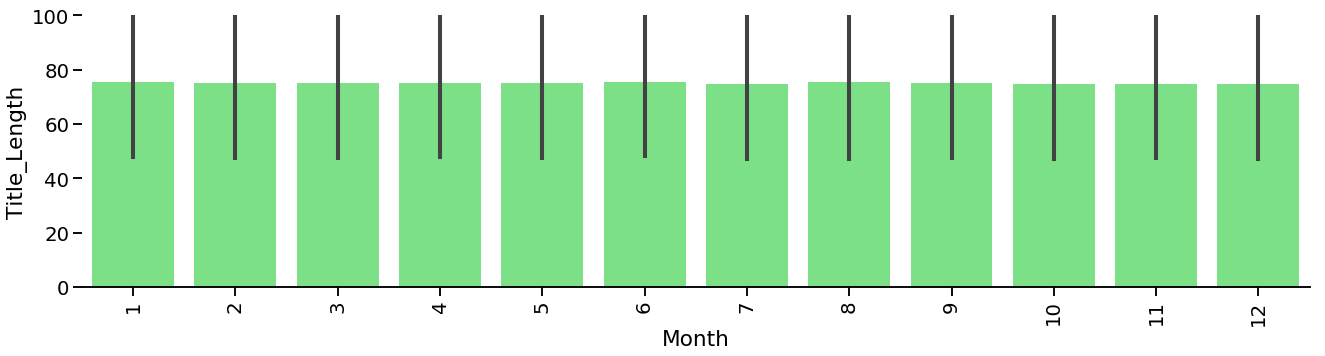

In [0]:
plt.figure(figsize=(22,5))
seaborn.barplot(data=dataset, x='Month', y='Title_Length',
               color=GREEN, ci='sd')
plt.ylabel('Title_Length')
plt.xlabel('Month')
plt.ylim(0, 100)
seaborn.despine(left=True)
plt.xticks(rotation=90)

#creo que un boxplot sirve mejor a los propositos gráficos, porque que el CI en la formula sea la desviacion estandar, no resulta informativo. Con el boxplot es mas claro la mediana de longitud de titulo y que en todos los meses, los outliers rondan mas o menos los mismos valores

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

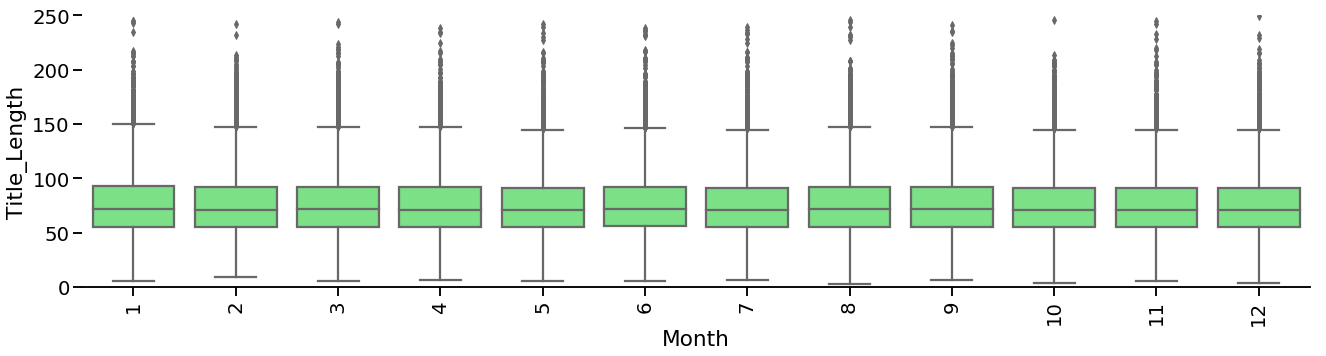

In [0]:

plt.figure(figsize=(22,5))
seaborn.boxplot(data=dataset, x='Month', y='Title_Length',         color=GREEN)
plt.ylabel('Title_Length')
plt.xlabel('Month')
plt.ylim(0, 250)
seaborn.despine(left=True)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

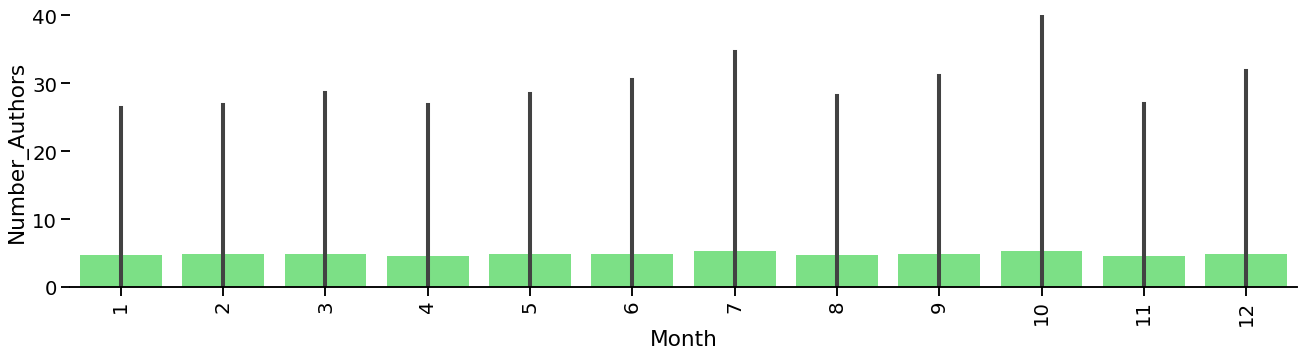

In [0]:
plt.figure(figsize=(22,5))
seaborn.barplot(data=dataset, x='Month', y='Number_Authors',               color=GREEN, ci='sd')
plt.ylabel('Number_Authors')
plt.xlabel('Month')
plt.ylim(0, 40)
seaborn.despine(left=True)
plt.xticks(rotation=90)

mismo razonamiento que en lo anterior, las barras de error son demasiado grandes para las caracteristicas de esta

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

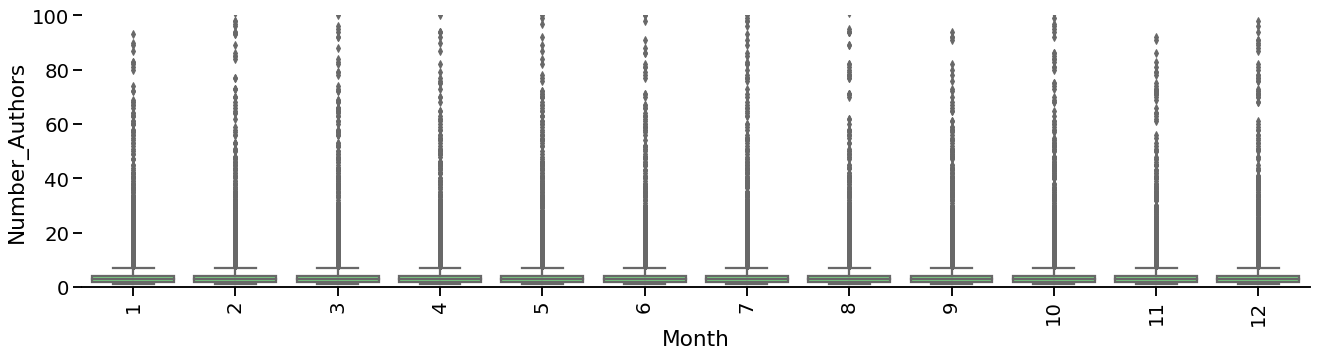

In [0]:
plt.figure(figsize=(22,5))
seaborn.boxplot(data=dataset, x='Month', y='Number_Authors',color=GREEN)
plt.ylabel('Number_Authors')
plt.xlabel('Month')
plt.ylim(0, 100)
seaborn.despine(left=True)
plt.xticks(rotation=90)

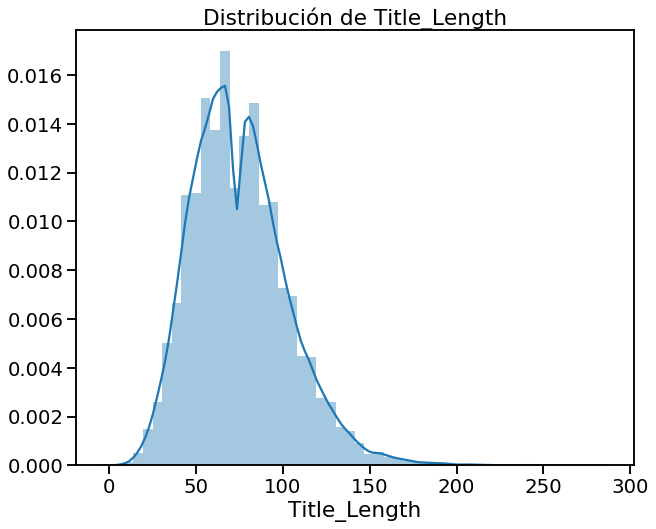

In [0]:
plt.figure(figsize=(10,8))
plt.title('Distribución de Title_Length')
seaborn.distplot(dataset.Title_Length.dropna(axis=0, how='all'))

La distribucion de Title Length se asemeja a una bimodal, en un test como shapiro wilk, se confirma que la distribucion no es normal (aunque para volumnes de datos tan grandes como estos el test no es apto para confirmar normalidad)





In [0]:
# normality test
from scipy.stats import shapiro
data=df[['Abstract_Length']]
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

In [0]:
plt.figure(figsize=(10,8))
plt.title('Distribución de Number_Authors')
seaborn.distplot(dataset.Number_Authors.dropna(axis=0, how='all'))

En este caso, la distribucion del numero de autores muestra una distribucion muy asimetrica, con alta densidad en un bajo numero de autores pero hay casos de numero total de autores que está en el rango de 200-1950, lo cual puede ser comun en estas disciplinas estudiadas pero no en otras ramas de la ciencia. Estos casos de altos numeros de autores , que son estadisticamente outliers, pero observando el set de datos se ve que corresponden a colaboraciones masivas en proyectos por ejemplo del CERN. 

In [0]:
# normality test
from scipy.stats import shapiro
data=df[['Title_Length']]
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

(array([0]), <a list of 1 Text xticklabel objects>)

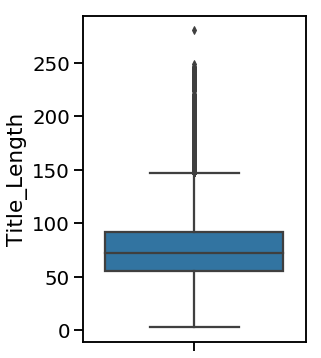

In [0]:
plt.figure(figsize=(4,6))
seaborn.boxplot(data=dataset, y='Title_Length')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

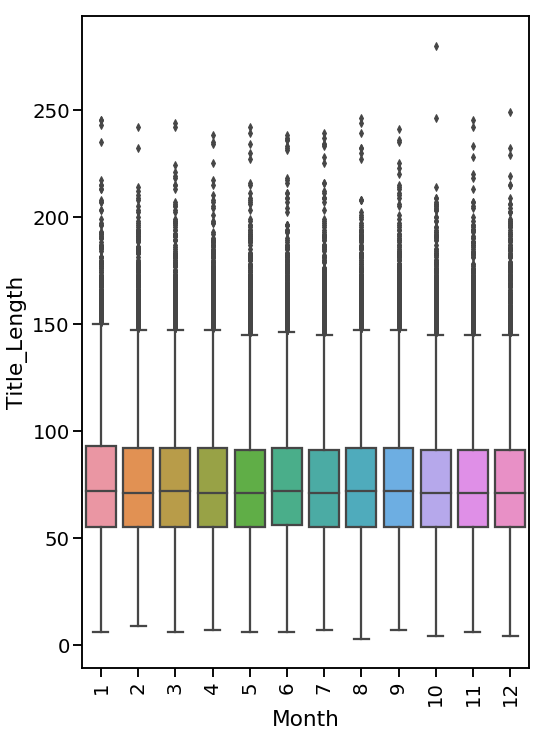

In [0]:
plt.figure(figsize=(8,12))
seaborn.boxplot(data=dataset, x='Month', y='Title_Length')
plt.xticks(rotation=90)

(array([0]), <a list of 1 Text xticklabel objects>)

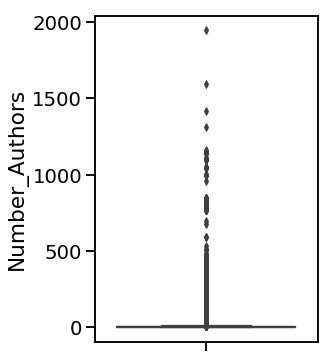

In [0]:
plt.figure(figsize=(4,6))
seaborn.boxplot(data=dataset, y='Number_Authors')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

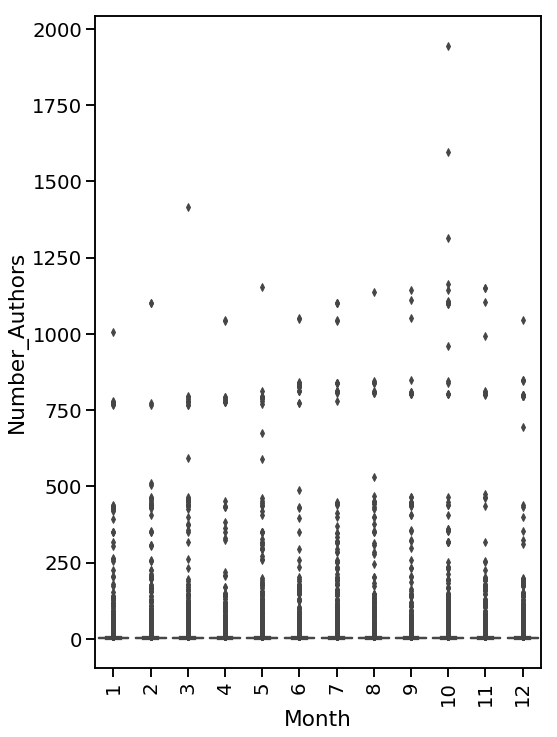

In [0]:
plt.figure(figsize=(8,12))
seaborn.boxplot(data=dataset, x='Month', y='Number_Authors')
plt.xticks(rotation=90)

La longitud de los los titulos de los papers tiene un rango de 277, que va desde longitud 3 hasta longitud 280. Presenta un longitud promedio de 75.137443 y la longitud que mas se repite es la longitud de 71.
Segùn se muestra graficamente se observan outliers en esta variable.
De todos modos, los outliers de longitud en cada uno de los meses son similares y en solo una ocasion la longitud  supera las 250 palabras que suele ser el limite superior en los journals. El numero de autores de los papers nos presenta un promedio de 4.8732 siendo 2 la cantidad de autores que mas se repite.

Tercer punto
Dividan en 4 partes el dataset y vayan calculando bayes con respecto a 2 variables aleatorias, usando los resultados de cada iteración / partición para calcular. El objetivo es simular que los datos que van llegando en cada iteración recalculan la probabilidad.

In [0]:
from scipy import stats
#
#estas variables aleatorias son la media y el desvio estandar del numero de autores
#
dataset1 = numpy.random.normal(4.873213, 25.445353, size=int(dataset.shape[0]/4)) 
print(int(dataset1.shape[0]/4))
loc, scale= stats.norm.fit(dataset1)
print('media', loc, ' - ds ', scale)

n= stats.norm(loc = loc, scale = scale)
n.rvs(4)

896
media 4.928061359111922  - ds  25.4268309486


array([ 27.07378443, -42.37378651, -21.01215348,  43.00898619])

In [0]:
import pymc3 as pm
with pm.Model() as nuestro_primer_modelo:
    θ = pm.Beta('θ', alpha=1, beta=1)  # a priori
    y = pm.Bernoulli('y', p=θ, observed=dataset)  # likelihood

#punto cuatro


hago un subset de las variables estrictamente numericas ( aunque incluyan por separado a los componentes del elemento Created (fechas en formato datetime64))

In [0]:
important_cols =dataset[['Year','Month','Day','Abstract_Length','Title_Length','Number_Authors','Number_Fields','Number_Categories']] 
imp_cols2=dataset[['Authors','Abstract_Length','Title_Length','Number_Authors','Number_Fields']] 

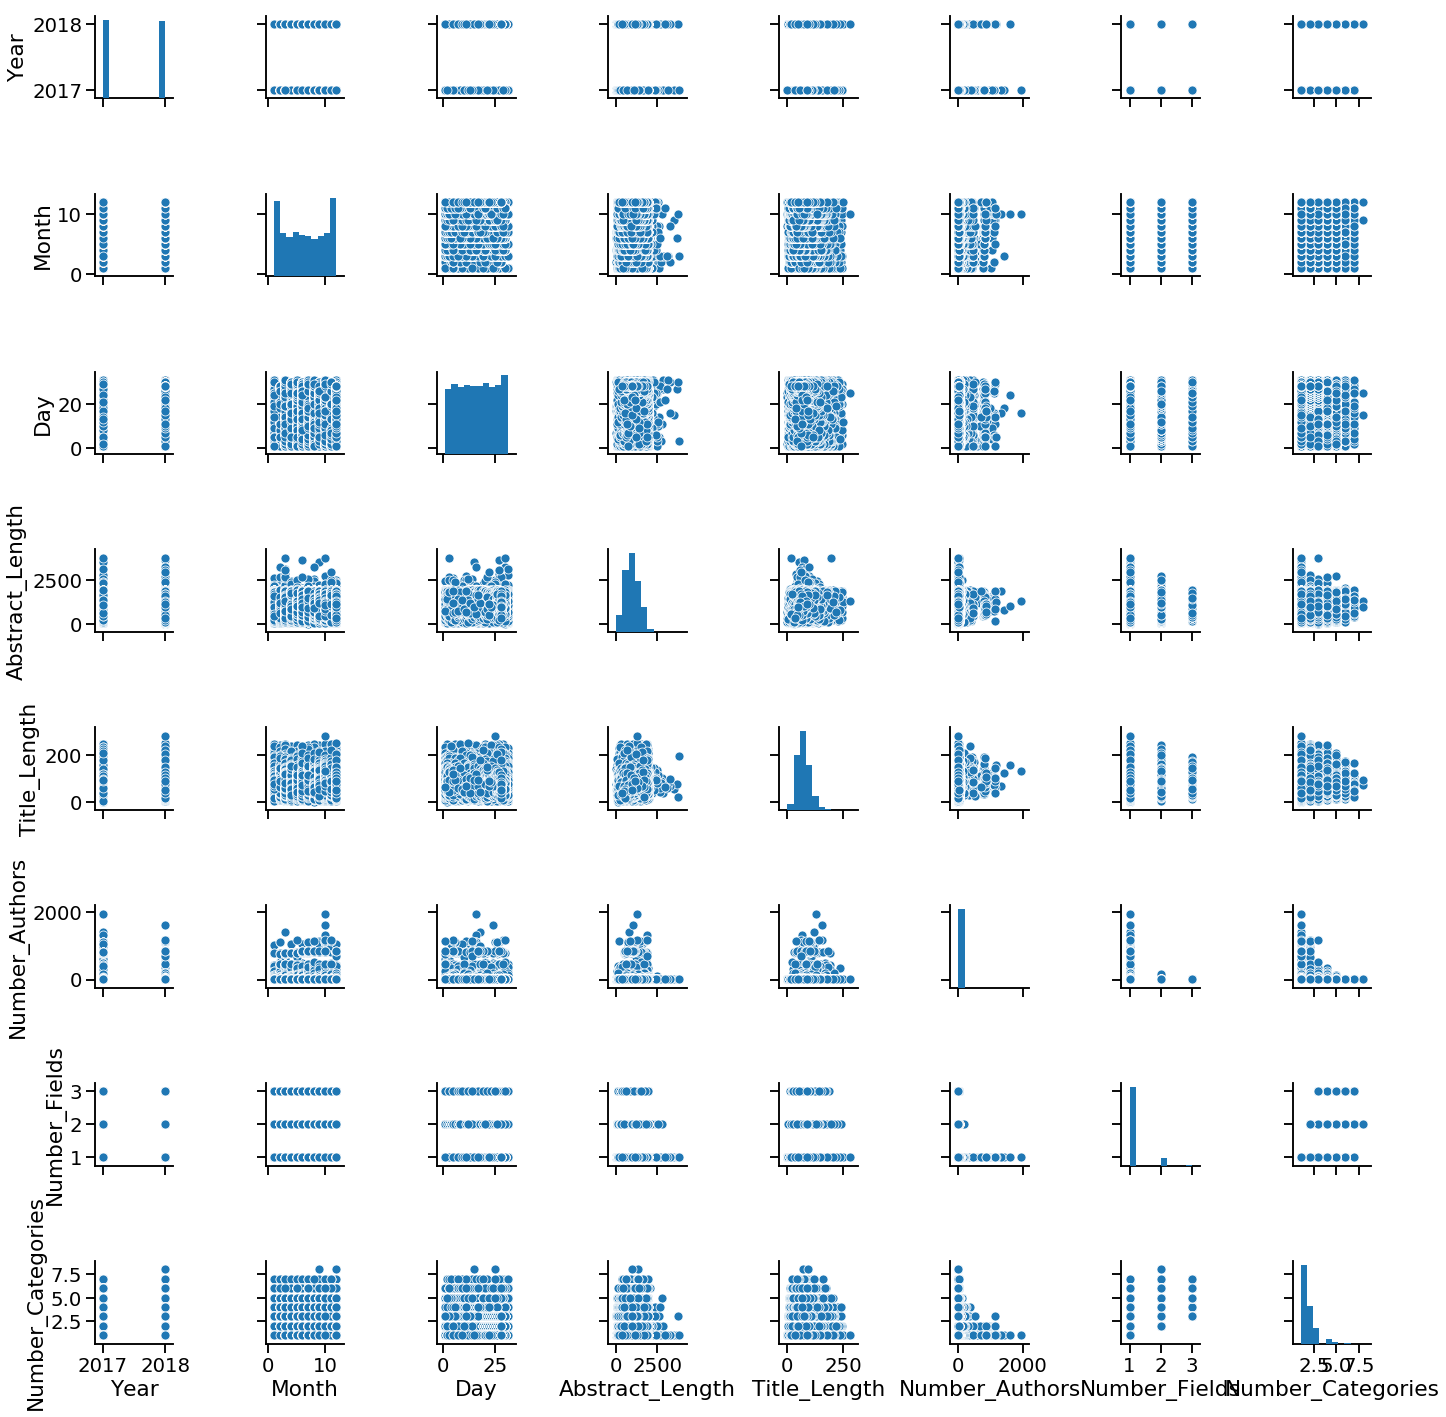

In [0]:
seaborn.pairplot(
    data=important_cols,
           markers='o')

In [0]:
outliers = imp_cols2[imp_cols2['Number_Authors'] > imp_cols2['Number_Authors'].mean() + 3 * imp_cols2['Number_Authors'].std()]
print(outliers)

Utilizando la funcion pairplot para explorar los datos de tipo numérico puede observarse:


*   Para los dos años registrados en la base de datos el número de papers subidos al sitio es muy similares (en ambos el numero de articulos es superior a 110000)
*   ( no se por qué la diferencia) Entre el grafico que genera pairplot y el histograma hay una discrepancia; en el pairplot  muestra los mayores valores en mes 1 y 12 (enero y diciembre respectivamente), cuando en el histograma la cantidad de archivos subido  no varia tanto de mes a mes ( aunque si se nota que marzo y mayo tiene mayores valores que otros meses)
*   Dado que solo hay tres posibles campos ( matematica, fisica y Comp Science), las relaciones con otras variables no parecen ser en ningun caso informativas
*  Abstract length y title length a pesar de ver que probablemente no son normales, son sus kernels de distribucion son los que tienen el aspecto mas explicativo

Diferentes maneras de observar el tema de las correlaciones

In [0]:
#a nivel numerico
#pero no aclara que metodo utiliza para computar las correlaciones

import pandas as pd
import numpy as np

def get_corrs(important_cols):
    col_correlations = important_cols.corr()
    col_correlations.loc[:, :] = np.tril(col_correlations, k=-1)
    cor_pairs = col_correlations.stack()
    return cor_pairs.to_dict()

my_corrs = get_corrs(important_cols)
print(my_corrs)

{('Year', 'Year'): 0.0, ('Year', 'Month'): 0.0, ('Year', 'Day'): 0.0, ('Year', 'Abstract_Length'): 0.0, ('Year', 'Title_Length'): 0.0, ('Year', 'Number_Authors'): 0.0, ('Year', 'Number_Fields'): 0.0, ('Year', 'Number_Categories'): 0.0, ('Month', 'Year'): -0.04107626214389971, ('Month', 'Month'): 0.0, ('Month', 'Day'): 0.0, ('Month', 'Abstract_Length'): 0.0, ('Month', 'Title_Length'): 0.0, ('Month', 'Number_Authors'): 0.0, ('Month', 'Number_Fields'): 0.0, ('Month', 'Number_Categories'): 0.0, ('Day', 'Year'): -0.007345666012341454, ('Day', 'Month'): -0.01788588714882495, ('Day', 'Day'): 0.0, ('Day', 'Abstract_Length'): 0.0, ('Day', 'Title_Length'): 0.0, ('Day', 'Number_Authors'): 0.0, ('Day', 'Number_Fields'): 0.0, ('Day', 'Number_Categories'): 0.0, ('Abstract_Length', 'Year'): 0.019259559936362147, ('Abstract_Length', 'Month'): -0.0006882310268288292, ('Abstract_Length', 'Day'): -0.0028790938778671844, ('Abstract_Length', 'Abstract_Length'): 0.0, ('Abstract_Length', 'Title_Length'): 0.0

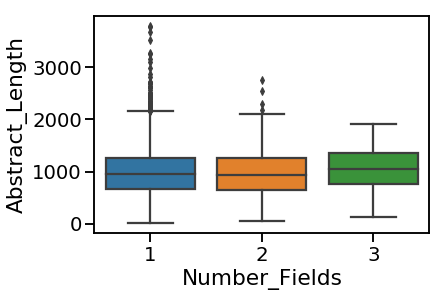

In [0]:
import seaborn as sns
sns.boxplot( x=dataset["Number_Fields"], y=dataset["Abstract_Length"] )

Correlaciones de las variables numericas (incluyendo las fechas) con un heatmap

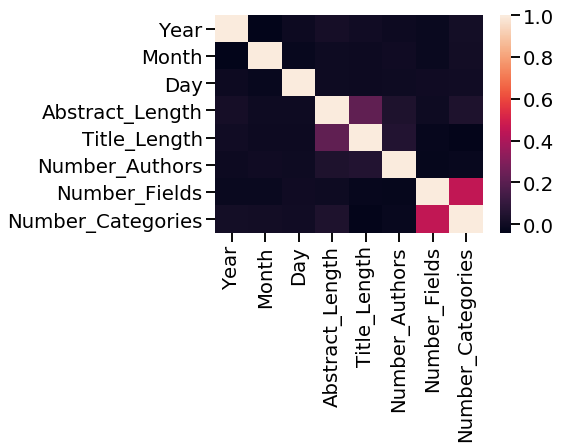

In [0]:
import seaborn as sns
corr = important_cols.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

correlaciones vistas en este caso con los valores de r

In [0]:
corr = important_cols.corr()
corr.style.background_gradient(cmap='coolwarm')

,Year,Month,Day,Abstract_Length,Title_Length,Number_Authors,Number_Fields,Number_Categories
Year,1,-0.0410763,-0.00734567,0.0192596,0.00573531,-0.00607989,-0.0153083,0.013934
Month,-0.0410763,1,-0.0178859,-0.000688231,-0.00507148,0.00201909,-0.0152933,0.00793939
Day,-0.00734567,-0.0178859,1,-0.00287909,-0.00476983,-0.00217966,0.000102479,0.00407856
Abstract_Length,0.0192596,-0.000688231,-0.00287909,1,0.21648,0.0430795,-0.00116475,0.0435823
Title_Length,0.00573531,-0.00507148,-0.00476983,0.21648,1,0.0556969,-0.0239659,-0.034807
Number_Authors,-0.00607989,0.00201909,-0.00217966,0.0430795,0.0556969,1,-0.0256061,-0.0191926
Number_Fields,-0.0153083,-0.0152933,0.000102479,-0.00116475,-0.0239659,-0.0256061,1,0.454287
Number_Categories,0.013934,0.00793939,0.00407856,0.0435823,-0.034807,-0.0191926,0.454287,1


con esta matriz  se ve mejor las correlaciones que se marcan en el heatmap:  principalmente entre **Abstract_Length** - **Title_Length**
y **Number_Categories**-**Number_Fields**. Probablemente estas correlaciones se hacen con Pearson; creemos que seria mas correcto usar correlaciones no parametricas como Spearman

In [0]:
## calculate spearman's correlation
from scipy import stats
coef, p = stats.spearmanr(important_cols['Abstract_Length'].dropna(), important_cols['Title_Length'].dropna())
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.216
Samples are correlated (reject H0) p=0.000


In [0]:
## calculate kendall's correlation
from scipy import stats
coef, p = stats.kendalltau(important_cols['Abstract_Length'].dropna(), important_cols['Title_Length'].dropna())
print('kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

kendall correlation coefficient: 0.147
Samples are correlated (reject H0) p=0.000


In [0]:
## calculate spearman's correlation
from scipy import stats
coef, p = stats.spearmanr(important_cols['Number_Authors'].dropna(), important_cols['Title_Length'].dropna())
print('spearman correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

spearman correlation coefficient: 0.168
Samples are correlated (reject H0) p=0.000


In [0]:
## calculate spearman's correlation
from scipy import stats
coef, p = stats.spearmanr(important_cols['Number_Fields'].dropna(), important_cols['Number_Categories'].dropna())
print('spearman correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

spearman correlation coefficient: 0.418
Samples are correlated (reject H0) p=0.000


In [0]:
## calculate spearman's correlation
from scipy import stats
coef, p = stats.kendalltau(important_cols['Number_Fields'].dropna(), important_cols['Number_Categories'].dropna())
print('spearman correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

spearman correlation coefficient: 0.397
Samples are correlated (reject H0) p=0.000


Correlacion a nivel visualizacion de las variables **Number_Fields** y **Number_Categories**

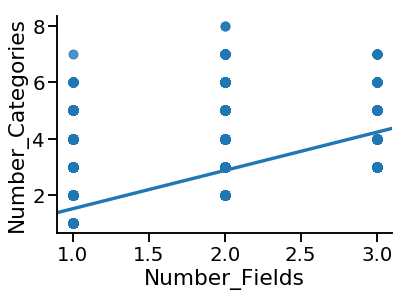

In [0]:
import seaborn as sns
seaborn.regplot(data=important_cols,
                x='Number_Fields', y='Number_Categories',
                marker='o')

seaborn.despine()

Dadas las caracteristicas de las variables número de categorias y número de campos de estudio, que son  valores numericos enteros, el grafico y la correlacion es significativa aunque no es informativo.

Calcular la probabilidad marginal y conjunta, y la correlación entre otras dos variables, por ejemplo 'Number_fields' y ' Number_Categories'. Representar visualmente la probabilidad conjunta entre los valores posibles de las variables elegidas.

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib as plt 

data_crosstab = pd.crosstab(important_cols['Number_Fields'], 
							important_cols['Number_Categories'], 
								margins = True) 
print(data_crosstab) 

Number_Categories       1      2      3     4     5    6   7  8     All
Number_Fields                                                          
1                  130897  53152  18489  4506   915   27   1  0  207987
2                       0   9425   6377  3374  1351  301  30  2   20860
3                       0      0    262   166   126   36  11  0     601
All                130897  62577  25128  8046  2392  364  42  2  229448


In [0]:
# Create function that returns probability percent rounded to one decimal place
def event_probability(event_outcomes, sample_space):
    probability = (event_outcomes / sample_space) 
    return round(probability, 4)

probabilidades marginales

para la variable categoria

In [0]:
# Sample Space
sp= 229448

# Determine the probability of belonging to one category
one_cat=130897
one_cat_probability = event_probability(one_cat, sp)

# Determine the probability of belonging to two Categories
two_cat=62577
two_cat_probability = event_probability(two_cat, sp)

# Determine the probability of belonging to three Categories
three_cat=25128
three_cat_probability = event_probability(three_cat, sp)

# Determine the probability of belonging to four Categories
four_cat=8046
four_cat_probability = event_probability(four_cat, sp)

# Determine the probability of belonging to five Categories
five_cat=2392
five_cat_probability = event_probability(five_cat, sp)

# Determine the probability of belonging to six Categories
six_cat=364
six_cat_probability = event_probability(six_cat, sp)

# Determine the probability of belonging to seven Categories
seven_cat=42
seven_cat_probability = event_probability(seven_cat, sp)


# Determine the probability of belonging to eight Categories
eight_cat=2
eight_cat_probability = event_probability(eight_cat, sp)



# Print each probability
print(str(one_cat_probability) )
print(str(two_cat_probability) )
print(str(three_cat_probability))
print(str(four_cat_probability) )
print(str(five_cat_probability) )
print(str(six_cat_probability) )
print(str(seven_cat_probability) )
print(str(eight_cat_probability) )

0.5705
0.2727
0.1095
0.0351
0.0104
0.0016
0.0002
0.0


probabilidad marginal para la variable Number_Fields

In [0]:

#
# Sample Space
sp= 229448

# Determine the probability of belonging to one field
one_field=207987
one_field_probability = event_probability(one_field, sp)


# Determine the probability of belonging to two field
two_field=20860
two_field_probability = event_probability(two_field, sp)

# Determine the probability of belonging to two field
three_field=601
three_field_probability = event_probability(three_field, sp)


# Print each probability
print(str(one_field_probability) )
print(str(two_field_probability))
print(str(three_field_probability) )

0.9065
0.0909
0.0026


Probabiliades conjuntas


In [0]:
# pertenece a 1 campo y con una categoria

sp= 229448

# pertenece a 1 campo y con una categoria
one_field_one_cat=130897
one_field_one_cat_probability = event_probability(one_field_one_cat, sp)



# pertenece a 1 campo y con dos categorias
one_field_two_cat=53152  
one_field_two_cat_probability = event_probability(one_field_two_cat, sp)

# pertenece a 1 campo y con tres categorias
one_field_three_cat=18489
one_field_three_cat_probability = event_probability(one_field_three_cat, sp)
# pertenece a 1 campo y con cuatro categorias
one_field_four_cat=4506
one_field_four_cat_probability = event_probability(one_field_four_cat, sp)
# pertenece a 1 campo y con cinco categorias
one_field_five_cat=915
one_field_five_cat_probability = event_probability(one_field_five_cat, sp)

# pertenece a 1 campo y con seis categorias
one_field_six_cat=27
one_field_six_cat_probability = event_probability(one_field_six_cat, sp)

# pertenece a 1 campo y con siete categorias

one_field_seven_cat=1
one_field_seven_cat_probability = event_probability(one_field_seven_cat, sp)
# pertenece a 1 campo y con ocho categorias

one_field_eight_cat=0
one_field_eight_cat_probability = event_probability(one_field_eight_cat, sp)

# Print each probability
print(str(one_field_one_cat_probability) )
print(str(one_field_two_cat_probability) )
print(str(one_field_three_cat_probability) )
print(str(one_field_four_cat_probability) )
print(str(one_field_five_cat_probability) )
print(str(one_field_six_cat_probability) )
print(str(one_field_seven_cat_probability) )
print(str(one_field_eight_cat_probability) )







0.5705
0.2317
0.0806
0.0196
0.004
0.0001
0.0
0.0


In [0]:
sp= 229448
# pertenece a 2 campos y con una categoria
two_field_one_cat= 0
two_field_one_cat_probability = event_probability(two_field_one_cat, sp)



# pertenece a 2 campos y con dos categorias
two_field_two_cat= 9425
two_field_two_cat_probability = event_probability(two_field_two_cat, sp)

# pertenece a 2 campos y con tres categorias

two_field_three_cat= 6377
two_field_three_cat_probability = event_probability(two_field_three_cat, sp)
# pertenece a 2 campos y con cuatro categorias

two_field_four_cat= 3374
two_field_four_cat_probability = event_probability(two_field_four_cat, sp)
# pertenece a 2 campos y con cinco categorias
two_field_five_cat=  1351
two_field_five_cat_probability = event_probability(two_field_five_cat, sp)
  
# pertenece a 2 campos y con seis categorias

two_field_six_cat=  301
two_field_six_cat_probability = event_probability(two_field_six_cat, sp)
# pertenece a 2 campos y con siete categorias

two_field_seven_cat=  30
two_field_seven_cat_probability = event_probability(two_field_seven_cat, sp)
# pertenece a 2 campos y con ocho categorias

two_field_eight_cat=  30
two_field_eight_cat_probability = event_probability(two_field_eight_cat, sp)

print(str(two_field_one_cat_probability) )
print(str(two_field_two_cat_probability) )
print(str(two_field_three_cat_probability) )
print(str(two_field_four_cat_probability) )
print(str(two_field_five_cat_probability) )
print(str(two_field_six_cat_probability) )
print(str(two_field_seven_cat_probability) )
print(str(two_field_eight_cat_probability) )

0.0
0.0411
0.0278
0.0147
0.0059
0.0013
0.0001
0.0001


In [0]:
# pertenece a 3 campos y con una categoria
 sp= 229448
three_field_one_cat= 0
three_field_one_cat_probability = event_probability(three_field_one_cat, sp)
# pertenece a 3 campos y con dos categorias


three_field_two_cat= 0
three_field_two_cat_probability = event_probability(three_field_two_cat, sp)
# pertenece a 3 campos y con tres categorias

three_field_three_cat= 262
three_field_three_cat_probability = event_probability(three_field_three_cat, sp)
# pertenece a 3 campos y con cuatro categorias
 
three_field_four_cat= 166
three_field_four_cat_probability = event_probability(three_field_four_cat, sp)

# pertenece a 3 campos y con cinco categorias

 
three_field_five_cat= 126
three_field_five_cat_probability = event_probability(three_field_five_cat, sp)
# pertenece a 3 campos y con seis categorias
 
three_field_six_cat= 36
three_field_six_cat_probability = event_probability(three_field_six_cat, sp)
# pertenece a 3 campos y con siete categorias

three_field_seven_cat= 11
three_field_seven_cat_probability = event_probability(three_field_seven_cat, sp)
# pertenece a 3 campos y con ocho categorias

three_field_eight_cat= 0
three_field_eight_cat_probability = event_probability(three_field_eight_cat, sp)
                                                      
                                                      
print(str(three_field_one_cat_probability))
print(str(three_field_two_cat_probability))
print(str(three_field_three_cat_probability))
print(str(three_field_four_cat_probability))
print(str(three_field_five_cat_probability))
print(str(three_field_six_cat_probability))
print(str(three_field_seven_cat_probability))
print(str(three_field_eight_cat_probability))
                                                      


0.0
0.0
0.0011
0.0007
0.0005
0.0002
0.0
0.0


visualizacion de la conjuncion de las variables Number_Fields y Number_Categories

/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


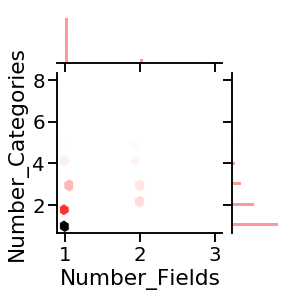

In [0]:

import seaborn as sns
joint_kws=dict(gridsize=17)
g = sns.jointplot("Number_Fields", "Number_Categories", data=important_cols, kind="hex",color="r",height=4, ratio=3, joint_kws= joint_kws)

#g = sns.jointplot(x="total_bill", y="tip", data=tips,kind="hex")                                           
                                                   